In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_estudiantes = pd.read_csv("./archivos-bd/BaseAprenderEstudiantes6Primaria2022-MuestralLyM.csv", sep=';')
df_referencias = pd.read_excel("./archivos-bd/EstudiantesAPRENDER2022PrimariaMuestral-DiccionarioDeVariables.xlsx", sheet_name="etiquetas de variables", header=1)
df_valores_variables = pd.read_excel("./archivos-bd/EstudiantesAPRENDER2022PrimariaMuestral-DiccionarioDeVariables.xlsx", sheet_name="valores de variables", header=1)

C:\Users\Valen\AppData\Local\Temp\ipykernel_6044\2321535097.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estudiantes = pd.read_csv("./archivos-bd/BaseAprenderEstudiantes6Primaria2022-MuestralLyM.csv", sep=';')


### Análisis Exploratorio de Datos

In [3]:
print(df_estudiantes.shape)
print(df_referencias.shape)
print(df_valores_variables.shape)

(128482, 117)
(117, 2)
(632, 3)


In [4]:
df_estudiantes.head()

,jurisdiccion,ID1,seccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,lpuntaje,mpuntaje,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp
0,2,396970010637139,2,22,2,2,,,,,...,"497,61646","395,31659",,,,,,,,
1,2,396970010637139,2,18,2,2,,,,,...,"440,10049","414,74878",,,,,,,,
2,2,396970010637139,1,18,2,2,,,,,...,"608,22382","549,40967",,,,,,,,
3,2,971700824929717,2,10,1,2,,,,,...,"582,31982","526,39301",,,,,,,,
4,2,971700824929717,1,23,1,2,,,,,...,"381,68524","418,19516",,,,,,,,


In [5]:
df_referencias.head()

,Variable,Etiqueta
0,jurisdiccion,Código de Jurisdicción
1,ID1,ID Ficticio
2,idseccion,Sección
3,idalumno,ID alumno
4,ap01,¿Cuántos años tenés?


In [6]:
df_valores_variables.head(28)

,Variable,Valores,Etiqueta
0,jurisdiccion,2,Ciudad Autónoma de Buenos Aires
1,NaN,6,Buenos Aires
2,NaN,10,Catamarca
3,NaN,14,Córdoba
4,NaN,18,Corrientes
5,NaN,22,Chaco
6,NaN,26,Chubut
7,NaN,30,Entre Ríos
8,NaN,34,Formosa
9,NaN,38,Jujuy


In [7]:
# Transformar el dataframe de referencias a una Serie para poder buscar por el nombre de la variable más facil
df_referencias = df_referencias.set_index(df_referencias.columns[0]).squeeze()

In [9]:
# Rellenar las columnas que tienen valores NaN por la variable correspondiente
for index, _ in enumerate(df_valores_variables["Variable"]):
    if index != 0:
        # Si estoy en un valor NaN y el anterior tiene un valor significa que debe tener el mismo valor que el anterior
        if pd.isnull(df_valores_variables["Variable"][index]) and not pd.isnull(df_valores_variables["Variable"][index-1]):
            df_valores_variables["Variable"][index] = df_valores_variables["Variable"][index-1]

df_valores_variables.head(30)

,Variable,Valores,Etiqueta
0,jurisdiccion,2,Ciudad Autónoma de Buenos Aires
1,jurisdiccion,6,Buenos Aires
2,jurisdiccion,10,Catamarca
3,jurisdiccion,14,Córdoba
4,jurisdiccion,18,Corrientes
5,jurisdiccion,22,Chaco
6,jurisdiccion,26,Chubut
7,jurisdiccion,30,Entre Ríos
8,jurisdiccion,34,Formosa
9,jurisdiccion,38,Jujuy


In [10]:
# Recorremos las columnas para saber si hay elementos nulos en las columnas del dataframe

# for column in df_estudiantes:
#     print("Columna:", column, "\t\t Cantidad nulos:", df_estudiantes[column].isnull().sum())
print(df_estudiantes.isnull().sum()) # Trunca el resultado

# Según este análisis ninguna columna tienen valores nulos pero analizando un poco mas a fondo observamos
# que hay columnas que tienen como valor un string vacio o un espacio " " por lo que se debe considerar
# como se tratarán estos caso
print(df_estudiantes["ap04"].unique())

#! Se debe tener especial cuidado porque en la misma columna hay variables del tipo int y string
#! que representan lo mismo

jurisdiccion             0
ID1                      0
seccion                  0
idalumno                 0
sector                   0
                        ..
migracion                0
sobreedad                0
Nivel_Ed_Madre           0
Nivel_Ed_Padre           0
Nivel_Ed_Persona_Resp    0
Length: 117, dtype: int64
[' ' '1' '-9' '8' '5' '13' '15' '2' '7' '-6' '12' '-8' '10' '4' '14' '11'
 '6' '9' '3' 1 10 7 8 -9 2 13 15 3 -6 9 12 5 14 4 -8 11 6]


In [11]:
## Definir una funcion para saber que indices nos sirven y que valor de refencia tienen
def buscar_referencias(nombre_referencia):
    return df_referencias[df_referencias.str.contains(nombre_referencia)]


## Practica para todas las muestras

### 1 - Graficar, en un mismo plano, la proporción de muestras con y sin acceso a internet.

In [12]:
# Para saber que variables hacen refencia a "Internet" utilizamos la función buscar_referencias
referencias_a_internet = buscar_referencias("Internet")

print(referencias_a_internet)

print(referencias_a_internet.values[0])
print(referencias_a_internet.index[0])

# Por lo que determinamos que la variable que analizaremos será "ap12d": "¿Disponés de los siguientes objetos o servicios en el lugar donde vivís? [Conexión a Internet]""
print(df_estudiantes["ap12d"].unique())

Variable
ap12d    ¿Disponés de los siguientes objetos o servicio...
ap16     Desde tu celular, ¿podés acceder a Internet po...
Name: Etiqueta, dtype: object
¿Disponés de los siguientes objetos o servicios en el lugar donde vivís? [Conexión a Internet]
ap12d
[' ' '1' '-9' '2' '-6' '-8' 1 2 -9 -8 -6]


#### Conversion y limpieza de datos

Mediante la observación manual de los datos, nos dimos cuenta de que el dataset no tiene de por sí variables categóricas porque todas estan mapeadas a valores enteros, sin embargo, como se verá más adelante, hay columnas del dataframe que contiene espacios y que tienen numeros y strings que representan lo mismo

In [13]:
def normalizar_categoricas(param):
    if isinstance(param, str):
        if param.isspace() or param == "":
            return int(param.replace(" ", "-9"))
        else:
            return int(param)
    else:
        return param

df_estudiantes["ap12d"] = df_estudiantes["ap12d"].map(normalizar_categoricas)

df_estudiantes["ap12d"].unique()

array([-9,  1,  2, -6, -8], dtype=int64)

ap12d
 1    108171
-9      9998
 2      9731
-8       405
-6       177
Name: count, dtype: int64


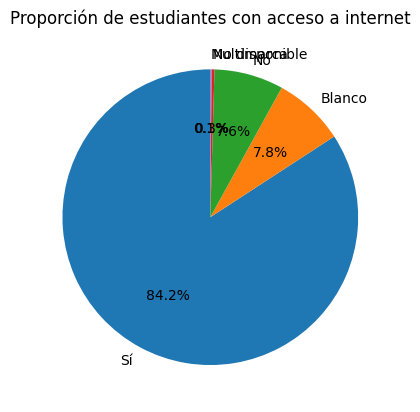

In [14]:
fig, ax = plt.subplots()

etiquetas = {
    -9: 'Blanco',
    -8: 'No disponible',
    -6: 'Multimarca',
    1: 'Sí',
    2: 'No'
}

plt.title('Proporción de estudiantes con acceso a internet')

conteo_valores = df_estudiantes['ap12d'].value_counts()

#! Ver que hacer con valores multimarca y no disponible
print(conteo_valores)

# Obtener los valores y etiquetas
valores = conteo_valores.values
etiquetas_pie = [etiquetas[valor] for valor in conteo_valores.index]

# Crear el gráfico de pie
handles = plt.pie(valores, labels=etiquetas_pie, autopct='%1.1f%%', startangle=90)

# plt.legend(zip(etiquetas.values(), valores), title="Etiquetas y valores", loc="upper right")

plt.show()


### 2 - Informar el porcentaje de estudiantes mayores de 13 años.

In [92]:
referencias_a_años = buscar_referencias("años")

print(referencias_a_años)

# Por lo que determinamos que la variable que analizaremos será "ap01": "¿Cuántos años tenés?"
print(df_referencias["ap01"])

print(df_estudiantes["ap01"].unique())

Variable
ap01                 ¿Cuántos años tenés?
ap02    ¿Cuál es el mes de tu cumpleaños?
Name: Etiqueta, dtype: object
¿Cuántos años tenés?
[' ' '-9' '-8' '-6' '1' '2' 2 3 4 5]


In [93]:
df_estudiantes["ap01"] = df_estudiantes["ap01"].map(normalizar_categoricas)

df_estudiantes["ap01"].unique()

array([-9, -8, -6,  1,  2,  3,  4,  5], dtype=int64)

ap01
-9     6102
-8      191
-6      105
 1      318
 2    67046
 3    51081
 4     2944
 5      695
Name: count, dtype: int64
ap01
-9     6102
-8      191
-6      105
 1      318
 2    67046
 3    51081
Name: count, dtype: int64
ap01
4    2944
5     695
Name: count, dtype: int64
menor13    124843
mayor13      3639
dtype: int64


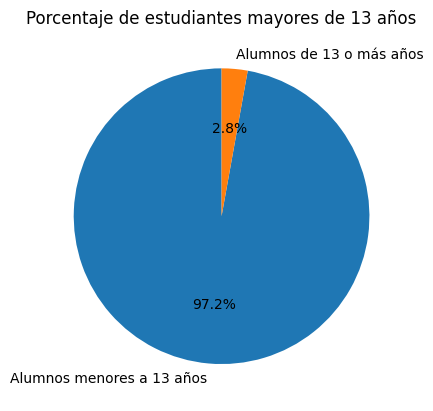

In [94]:
fig, ax = plt.subplots()

etiquetas = {
    'menor13': 'Alumnos menores a 13 años',
    'mayor13': 'Alumnos de 13 o más años'
}

plt.title('Porcentaje de estudiantes mayores de 13 años')

conteo_valores = df_estudiantes["ap01"].value_counts().sort_index()

#! Ver que hacer con valores en blanco, multimarca y no disponible
print(conteo_valores)
print(conteo_valores.iloc[0:6])
print(conteo_valores.iloc[6:])

# Obtener los valores y etiquetas
valores = pd.Series([conteo_valores.iloc[0:6].sum(), conteo_valores.iloc[6:].sum()], index=["menor13", "mayor13"])
print(valores)
etiquetas_pie = [etiquetas[valor] for valor in valores.index]

# Crear el gráfico de pie
handles = plt.pie(valores, labels=etiquetas_pie, autopct='%1.1f%%', startangle=90)

# plt.legend(zip(etiquetas.values(), valores), title="Etiquetas y valores", loc="upper right")

plt.show()

### 3 -  Graficar, en un mismo plano, las proporciónes de muestras de las 10 jurisdicciones con mayor cantidad de estudiantes.

In [95]:
print(df_referencias["jurisdiccion"])

print(df_estudiantes["jurisdiccion"].unique())

# Agrupar con jurisdiccion y sumar para ver si se consideran todos los valores, la suma debe dar igual a 128482
df_estudiantes["jurisdiccion"].value_counts().values.sum()

Código de Jurisdicción
[ 2  6 10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78 82 86 90 94]


128482

In [96]:
# Armar una Serie que contenga el valor de la provincia como key y el nombre como value
df_jurisdiccion = df_valores_variables[df_valores_variables["Variable"] == "jurisdiccion"]
df_jurisdiccion_sin_columna_variable = df_jurisdiccion.drop("Variable", axis=1)
valores_etiqueta = df_jurisdiccion_sin_columna_variable.set_index(df_jurisdiccion_sin_columna_variable.columns[0]).squeeze()

valores_etiqueta.values

array(['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Catamarca',
       'Córdoba', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos',
       'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [97]:
# Reemplazar los valores por su correspondiente provincia
cantidad_estudiantes_por_jurisdiccion = df_estudiantes["jurisdiccion"].value_counts()

cantidad_estudiantes_por_jurisdiccion.index = cantidad_estudiantes_por_jurisdiccion.index.map(valores_etiqueta)

cantidad_estudiantes_por_jurisdiccion


jurisdiccion
Buenos Aires                                             22535
Córdoba                                                   7467
Santa Fe                                                  7382
Mendoza                                                   6370
Ciudad Autónoma de Buenos Aires                           5767
Tucumán                                                   5696
Jujuy                                                     5594
Santiago del Estero                                       5376
San Juan                                                  5172
Salta                                                     5034
Chubut                                                    4888
Corrientes                                                4670
Formosa                                                   4315
La Pampa                                                  4154
Catamarca                                                 4146
Chaco                                     

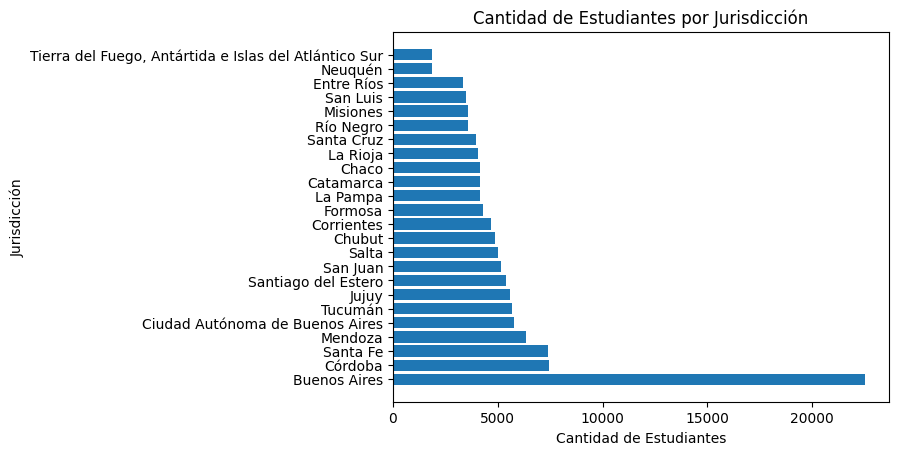

In [98]:
# Crear un gráfico de barras horizontales
plt.barh(cantidad_estudiantes_por_jurisdiccion.index, cantidad_estudiantes_por_jurisdiccion.values)

# Etiquetas y título
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Jurisdicción')
plt.title('Cantidad de Estudiantes por Jurisdicción')

# Mostrar el gráfico
plt.show()

### 4 - Graficar, en un mismo plano, la proporción de muestras con residencia rural y urbana.

In [118]:
# Encontrar que variable hacia referencia a si el ámbito era rural o urbano fue más dificil porque no había una relación directa
# en el dataframe de referencia por lo que su obtención se hizo mediante la observación manual

print(df_valores_variables[df_valores_variables["Variable"] == "ambito"])
print(df_estudiantes["ambito"].unique())

    Variable  Valores Etiqueta
583   ambito        1    Rural
584   ambito        2   Urbano
[2 1]


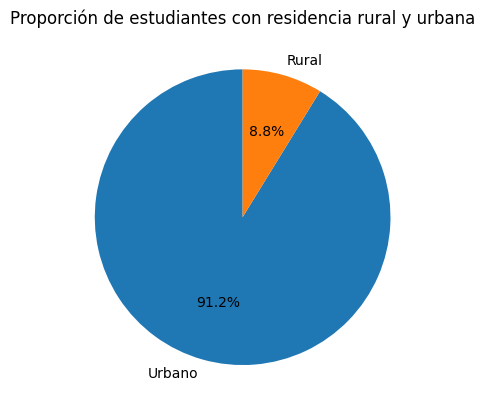

In [119]:
fig, ax = plt.subplots()

etiquetas = {
    1: "Rural",
    2: "Urbano"
}

plt.title('Proporción de estudiantes con residencia rural y urbana')

conteo_valores = df_estudiantes['ambito'].value_counts()

# Obtener los valores y etiquetas
valores = conteo_valores.values
etiquetas_pie = [etiquetas[valor] for valor in conteo_valores.index]

# Crear el gráfico de pie
handles = plt.pie(valores, labels=etiquetas_pie, autopct='%1.1f%%', startangle=90)

# plt.legend(zip(etiquetas.values(), valores), title="Etiquetas y valores", loc="upper right")

plt.show()